In [12]:
import numpy as np
from astropy.table import Table
import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
planck_scaling_factor = Table.read('planck_scaling_factor.dat', format='ascii')
bolocam_scaling_factor = Table.read('bolocam_scaling_factor.dat', format='ascii')
planck_scaling_factor_jk = Table.read('planck_scaling_factor_jk.dat', format='ascii')
bolocam_scaling_factor_jk = Table.read('bolocam_scaling_factor_jk.dat', format='ascii')

In [79]:
planck_skew = []
for i in range(0, len(planck_scaling_factor_jk.columns)):
    planck_skew.append(stats.skew(np.log10(planck_scaling_factor_jk.columns[i])))
    
bolocam_skew = []
for i in range(0, len(bolocam_scaling_factor_jk.columns)):
    bolocam_skew.append(stats.skew(np.log10(bolocam_scaling_factor_jk.columns[i])))

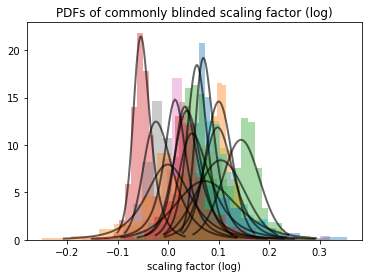

In [59]:
planck_names = ['A2029','A0478','PKS0745','RXJ1542']
for i in range(0, 3):
    df, nc, loc, scale = stats.nct.fit(np.log10(planck_scaling_factor_jk.columns[i]), fnc = planck_skew[i])
    x = np.linspace(stats.nct.ppf(0.01, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.99, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(np.log10(planck_scaling_factor_jk.columns[i]), bins=20, density=True, alpha=0.4)
    
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']
for i in range(0, 11):
    df, nc, loc, scale = stats.nct.fit(np.log10(bolocam_scaling_factor_jk.columns[i]), fnc = bolocam_skew[i])
    x = np.linspace(stats.nct.ppf(0.01, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.99, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(np.log10(bolocam_scaling_factor_jk.columns[i]), bins=20, density=True, alpha=0.4)
plt.title('PDFs of commonly blinded scaling factor (log)')
plt.xlabel('scaling factor (log)')
plt.savefig('commonly_blinded_pdfs.jpg')
plt.show()

In [60]:
planck_errors = []
planck_data = []
for i in range(0, 3):
    planck_errors.append(np.std(np.log10(planck_scaling_factor_jk.columns[i])))
    planck_data.append(np.log10(planck_scaling_factor.columns[i]))
    
bolocam_errors = []
bolocam_data = []
for i in range(0, 11):
    bolocam_errors.append(np.std(np.log10(bolocam_scaling_factor_jk.columns[i])))
    bolocam_data.append(np.log10(bolocam_scaling_factor.columns[i]))

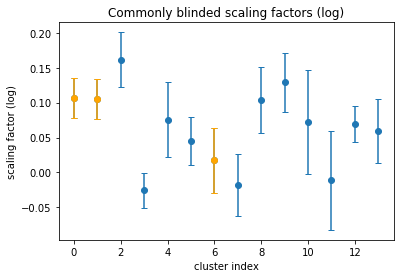

In [56]:
plt.errorbar([0,1,2,3,4,5,6,7,8,9,10,11,12,13], planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', capsize=3)
plt.errorbar([0,1,6], [planck_data[0], planck_data[1], bolocam_data[3]], 
             [planck_errors[0], planck_errors[1], bolocam_errors[3]], marker='o', ls='', color='orange', capsize=3)
plt.title('Commonly blinded scaling factors (log)')
plt.xlabel('cluster index')
plt.ylabel('scaling factor (log)')
#plt.savefig('commonly_blinded_scaling_factor.jpg')
plt.show()

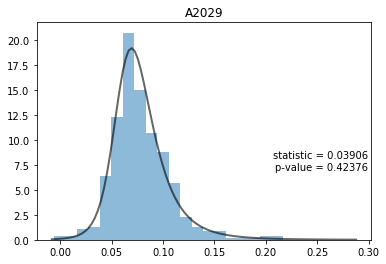

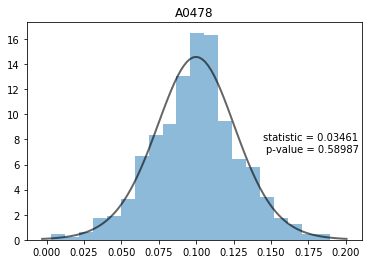

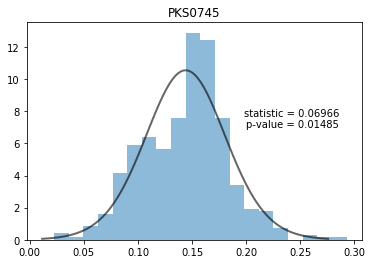

In [80]:
for i in range(0, 3):
    df, nc, loc, scale = stats.nct.fit(np.log10(planck_scaling_factor_jk.columns[i]), fnc = planck_skew[i])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(np.log10(planck_scaling_factor_jk.columns[i]), bins=20, density=True, alpha=0.5)
    plt.title(planck_names[i])
    statistic, pval = stats.kstest(np.log10(planck_scaling_factor_jk.columns[i]), 'nct', [df, nc, loc, scale])
    plt.text(np.mean(x) + 1.85*np.std(x), 7, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    plt.savefig(planck_names[i] + '_commonly_blinded.jpg')
    plt.show()

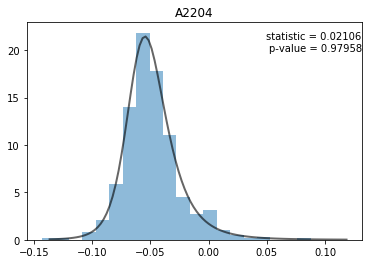

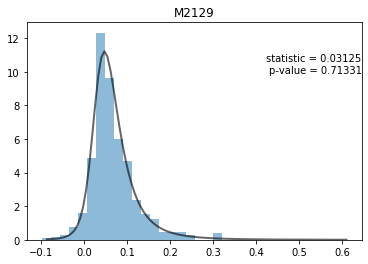

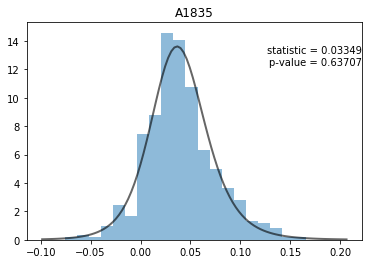

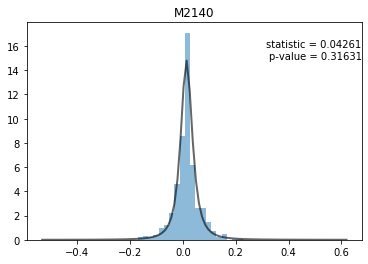

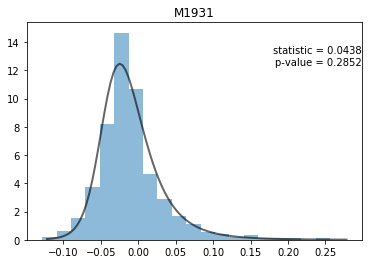

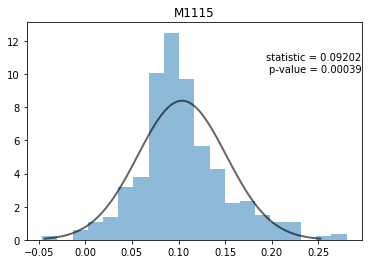

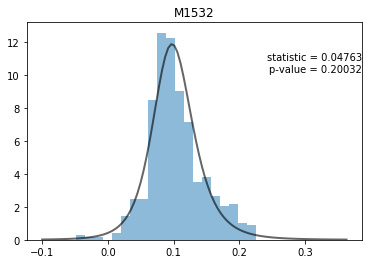

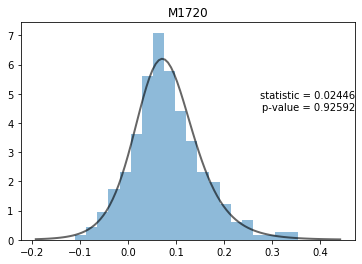

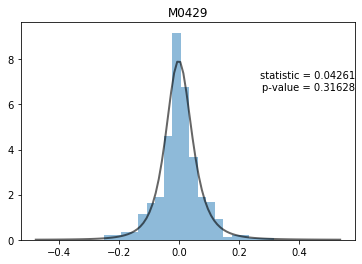

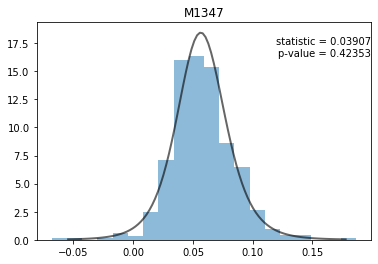

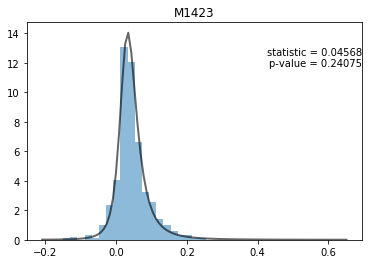

In [62]:
for i in range(0, 11):
    df, nc, loc, scale = stats.nct.fit(np.log10(bolocam_scaling_factor_jk.columns[i]), fnc = bolocam_skew[i])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    fig, ax = plt.subplots()
    ax.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    ax.hist(np.log10(bolocam_scaling_factor_jk.columns[i]), bins=20, density=True, alpha=0.5)
    plt.title(bolocam_names[i])
    statistic, pval = stats.kstest(np.log10(bolocam_scaling_factor_jk.columns[i]), 'nct', [df, nc, loc, scale])
    plt.text(ax.get_xlim()[1], ax.get_ylim()[1] - 3, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    plt.savefig(bolocam_names[i] + '_commonly_blinded.jpg')
    plt.show()